In [2]:
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,Flatten,Activation,LeakyReLU
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Conv1D, Conv2D
from keras.layers.normalization import BatchNormalization

from keras.optimizers import SGD
import keras
import matplotlib.pylab as plt


Using TensorFlow backend.


In [4]:
path = '/data1/home/feynman52/ntu-ml/hw3/data/'

df_train = pd.read_csv(path+'train.csv')
df_test = pd.read_csv(path+'test.csv')


In [5]:
y_train = df_train['label']
y_train = to_categorical(y_train,num_classes=7)

x_train = df_train['feature']
x_train = x_train.str.split()
x_train = x_train.values
x_train = [np.array(x,dtype=np.int32) for x in x_train]
x_train = np.array(x_train)

print(x_train.shape)
print(y_train.shape)


(28709, 2304)
(28709, 7)


In [6]:
x_test = df_test['feature']
x_test = x_test.str.split()
x_test = x_test.values
x_test = [np.array(x,dtype=np.int32) for x in x_test]
x_test = np.array(x_test)

print(x_test.shape)

(7178, 2304)


In [7]:
x_train = np.reshape(x_train,(28709,48,48,1))
print(x_train.shape)
x_test = np.reshape(x_test,(7178,48,48,1))
print(x_test.shape)

(28709, 48, 48, 1)
(7178, 48, 48, 1)


In [15]:
np.save('x_train.npy',x_train)
np.save('y_train.npy',y_train)
np.save('x_test.npy',x_test)

## problem1 & problem2

In [124]:
num_classes = 7
input_shape = (48,48,1)
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))




model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [125]:

# input_shape = (48,48,1)
# model = Sequential()

# # model.add(BatchNormalization())

# model.add(Conv2D(64,input_shape=input_shape, kernel_size=(5, 5), padding='same', kernel_initializer='glorot_normal'))
# model.add(LeakyReLU(alpha=1./20))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_initializer='glorot_normal'))
# model.add(LeakyReLU(alpha=1./20))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.3))

# model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_initializer='glorot_normal'))
# model.add(LeakyReLU(alpha=1./20))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.35))

# model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_initializer='glorot_normal'))
# model.add(LeakyReLU(alpha=1./20))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# model.add(Dropout(0.35))

# model.add(Flatten())

# model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu', kernel_initializer='glorot_normal'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax', kernel_initializer='glorot_normal'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_46 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 18, 18, 128)       147584    
__________

In [127]:
class History(keras.callbacks.Callback):
    def on_train_begin(self,logs={}):
        self.tr_losses=[]
        self.val_losses=[]
        self.tr_accs=[]
        self.val_accs=[]

    def on_epoch_end(self,epoch,logs={}):
        self.tr_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.tr_accs.append(logs.get('acc'))
        self.val_accs.append(logs.get('val_acc'))
time_callback = History()

In [128]:
# training log
path =  '/data1/home/feynman52/NTU_ML_HW/hw3/data/log.csv' 
csv_logger = keras.callbacks.CSVLogger(path)

In [129]:
batch_size = 128
epochs = 50


In [130]:
history = model.fit(x = x_train,
                    y = y_train,
                    verbose = 1,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[csv_logger])

Epoch 1/50
28709/28709 [==============================] - 12s 407us/step - loss: 1.8796 - acc: 0.2666
Epoch 2/50
28709/28709 [==============================] - 10s 344us/step - loss: 1.6174 - acc: 0.3663
Epoch 3/50
28709/28709 [==============================] - 10s 344us/step - loss: 1.5111 - acc: 0.4135
Epoch 4/50
28709/28709 [==============================] - 10s 351us/step - loss: 1.4233 - acc: 0.4506
Epoch 5/50
28709/28709 [==============================] - 10s 347us/step - loss: 1.3482 - acc: 0.4859
Epoch 6/50
28709/28709 [==============================] - 10s 347us/step - loss: 1.2930 - acc: 0.5078
Epoch 7/50
28709/28709 [==============================] - 10s 346us/step - loss: 1.2423 - acc: 0.5322
Epoch 8/50
28709/28709 [==============================] - 10s 348us/step - loss: 1.2042 - acc: 0.5452
Epoch 9/50
28709/28709 [==============================] - 10s 346us/step - loss: 1.1590 - acc: 0.5663
Epoch 10/50
28709/28709 [==============================] - 10s 346us/step - loss: 

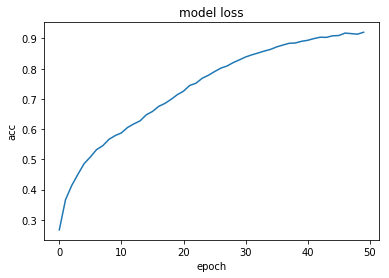

In [131]:
# plot
plt.plot(history.history['acc'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('acc')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper right')

# fileName = dirName +'_'+ 'loss.png'
# path = dirName +'/'+ fileName
# plt.savefig(path)

plt.show()

In [132]:
model.save('my_model.h5')